# MOESP ALGORITHM

We discuss the basic subspace identification method called MOESP
method 4 due to Verhaegen and Dewilde [172, 173].

This are the general steps to obtain the matrices A, B, C, D with this method:

$\textbf{Step 1:}$ Compute the LQ decomposition of (6.32).

$\textbf{Step 2:}$ Compute the SVD of (6.39), and let $n:=dim(\Sigma_1)$ and define the extended observability matrix as

$\mathcal{O}_k = U_k \Sigma_1^{1/2}$

$\textbf{Step 3:}$ Obtain C and A from (6.41) and (6.42), respectively.

$\textbf{Step 4:}$ Solve (6.44) by the least-squares method to estimate B and D.

### MOESP PROGRAM IN PYTHON

### 1. Import Libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

### 2. Use a Benchmark
Choose one option to test and disable the other to test this program:

$\textbf{Option 1:}$
In this option it is generate the matrices selecting the numbers of inputs, outputs and states of the dynamic system.

In [18]:
#NUMBER OF SAMPLES
N = 100
#NUMBER OF INPUTS
m = 3
#NUMBER OF OUTPUTS
p = 2
#NUMBER OF STATES
n = 2
#BENCHMARK1
A = np.random.randn(n,n) # n x n = 2 x 2
B = np.random.randn(n,m) # n x m = 2 x 3
C = np.random.randn(p,n) # p x n = 2 x 2
D = np.random.randn(p,m) # p x m = 2 x 3

$\textbf{Option 2:}$
In this Benchmark it is selected an especifics matrices, that represent a dynamic system with some characteristics like estability.

In [19]:
#BENCHMARK2
# A=np.array([[0.6, 0.4],[-0.4, 0.6]])
# B=np.array([[0],[1]])
# C=np.array([[1,0.5]])
# D=np.array([[0]])
# n = len(A)
# m = len(B[1])
# p = len(C)
#NUMBER OF SAMPLES
#N = 100

### 3. Generate an Output using an Input

Using an specific input or random input, it is generate an ouput with N samples.

$$
\begin{equation*}
\textbf{x}_{t+1} = \textbf{A} \textbf{x}_{t} + \textbf{B} \textbf{u}_{t}\\
\textbf{y}_{t} = \textbf{C} \textbf{x}_{t} + \textbf{D} \textbf{u}_{t}
\end{equation*}
$$

where the dimensions of matrices are:

$A \in \mathbb{R}^{n \times n},
B \in \mathbb{R}^{n \times m},
C \in \mathbb{R}^{p \times n},
D \in \mathbb{R}^{p \times m}
$

In [20]:
u = np.random.randn(m,N) # m=3
x = np.random.randn(n,1) # n=2
x_aux = []
y_aux = []
y = np.zeros((p,1))
for t in range(0,N):
    x_aux= np.dot(A, x[:,t]) +np.dot(B,u[:,t])
    x_aux = np.reshape(x_aux,(-1,1))
    x = np.append(x,x_aux,axis = 1)
    y_aux = np.dot(C,x[:,t]) + np.dot(D,u[:,t])
    y_aux = np.reshape(y_aux,(-1,1))
    y = np.append(y,y_aux, axis=1)

x = x[:,:-1]
y = y[:,1:]

The variables of m, p, n that represent, the number of input, number of ouputs and number of states will be used in the rest of the program. 

In [21]:
#NUMBER OF INPUTS
m = len(u)
#NUMBER OF OUTPUTS
p = len(y)
#NUMBER OF STATES
n = len(x)
#NUMBER OF INPUT AND OUTPUT IN THE HANKEL MATRIX
k = 8 
#NUMBER OF SAMPLES USED IN THE HANKEL MATRIX
N_prima = N-k+1

### 4. Generate an Input and Output past

From chapter (6.3), where N_prima is sufficiently large, k>0 and k is strictly greater than n.

$$ \begin{equation*}
U_{o|k-1} = \begin{bmatrix} u(0) & u(1) & \dots & u(N-1) \\ u(1) & u(2) & \dots & u(N) \\ \vdots & \vdots & & \vdots \\ u(k-1) & u(k) & \dots & u(k+N-2) \end{bmatrix} \in \mathbb{R}^{km\times N} \\ 
Y_{o|k-1} = \begin{bmatrix} y(0) & y(1) & \dots & y(N-1) \\ y(1) & y(2) & \dots & y(N) \\ \vdots & \vdots & & \vdots \\ y(k-1) & y(k) & \dots & y(k+N-2) \end{bmatrix} \in \mathbb{R}^{kp\times N} 
\end{equation*}
$$

In [22]:
#Past: U and Y
U_past = u[:,:N_prima]
Y_past = y[:,:N_prima]
for i in range(1,k):
    U_past = np.append(U_past,u[:,i:N_prima+i],axis=0)
    Y_past = np.append(Y_past,y[:,i:N_prima+i],axis=0)

### 5. LQ Decomposition

Let the LQ decomposition of a data matrix be given by
$$
\begin{equation}
\begin{bmatrix} U_{o|k-1} \\ Y_{o|k-1} \end{bmatrix} = \begin{bmatrix} L_{11} & 0 \\ L_{21} & L_{22}\end{bmatrix} \begin{bmatrix}Q_1^T \\ Q_2^T\end{bmatrix} 
\end{equation}\tag{6.32}
$$

$L_{11}\in\mathbb{R}^{km\times km}, L_{21}\in\mathbb{R}^{kp\times km},
L_{22}\in\mathbb{R}^{kp\times kp}$ with $L_{11}, L_{22}$ lower triangular, and $Q_1\in\mathbb{R}^{N\times km}, Q_2\in\mathbb{R}^{N\times kp}$ are orthogonal. The actual computation of LQ decomposition is performed by taking the transpose of the QR decomposition of the tall matrix

$$
\begin{equation*}
\begin{bmatrix} U_{o|k-1}^{T} & Y_{o|k-1}^{T}
\end{bmatrix}\in \mathbb{R}^{N\times k(m+p)}
\end{equation*}
$$

see the table 6.1 of "Subspace Methods for System Identification" from Tohru Katayama.

From (6.32), we obtain 

$$
\begin{equation}
\begin{bmatrix} L_{11} & 0 \\ L_{21} & L_{22}\end{bmatrix} = \begin{bmatrix} U_{o|k-1} \\ Y_{o|k-1} \end{bmatrix} \begin{bmatrix}Q_1 & Q_2\end{bmatrix} 
\end{equation}\tag{6.36}
$$

In [23]:
#LQ DECOMPOSITION of table 6.1
# Q, R = scipy.linalg.qr(np.append(U_past,Y_past,axis=0))
matrix_transpose = np.transpose(np.append(U_past,Y_past,axis=0))
Q, L = scipy.linalg.qr(matrix_transpose)
Q = np.transpose(Q)
L = np.transpose(L)
L11 = L[:k*m,:k*m]
L21 = L[k*m:(k*m+k*p),:k*m]
L22 = L[k*m:(k*m+k*p),k*m:(k*m+k*p)]

### 6. SVD Decomposition

It can be obtain the image of the extended observability matrix $\mathcal{O}_k$ and hence the dimension $n$ from the SVD of $L_{22}\in\mathbb{R}^{kp\times kp}$
Let the SVD of $L_{22}$ be given by

$$
\begin{equation}
L_{22} = \begin{bmatrix} U_1 & U_2 \end{bmatrix}
\begin{bmatrix} \Sigma_1 & 0 \\ 0 & 0 \end{bmatrix} 
\begin{bmatrix} V_{1}^T \\ V_{2}^T \end{bmatrix} 
= U_1 \Sigma_{1} V_{1}^T 
\end{equation}\tag{6.39}
$$

where $U_1 \in\mathbb{R}^{kp\times n}$ $U_2 \in\mathbb{R}^{kp\times(kp-n)}$ . Then we have 

$$
\begin{equation*}
\mathcal{O}_k X_0 Q_2= U_1 \Sigma_{1} V_{1}^T
\end{equation*}
$$

so that we define the extended observability matrix as

$$
\begin{equation}
\mathcal{O}_k = U_1 \Sigma_1^{1/2} 
\end{equation}\tag{6.40}
$$

In [24]:
U_svd,S_svd,V_svd = scipy.linalg.svd(L22, full_matrices=True)
S_svd_diag = np.diag(S_svd)
S1_svd_diag = S_svd_diag[:n,:n]
U1_svd = U_svd[:,:n]
O_k = np.dot(U1_svd,scipy.linalg.sqrtm(S1_svd_diag))


and $n:= dim \Sigma_1$. The matrix $C$ is readily given by

$$
\begin{equation}
C = \mathcal{O}_k (1:p, 1:n) 
\end{equation}\tag{6.41}
$$

and $A$ is obtained by solving the linear equation (see Lemma 6.1)

$$
\begin{equation}
\mathcal{O}_k (1:p(k-1), 1:n) A = \mathcal{O}_k(p+1:kp,1:n) 
\end{equation}\tag{6.42}
$$

In [25]:
#Matrices A and C
C_k = O_k[:p,:n]
A_k = np.dot(np.linalg.pinv(O_k[:p*(k-1),:n]),O_k[p:p*k,:n])

Using the equation (6.43) 

$$
\begin{equation}
U_2^T
\begin{bmatrix}D & 0 & \dots & 0 \\ CB & D & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ CA^{k-2}B & CA^{k-3}B & \dots & D \end{bmatrix}
= U_2^T L_{21} L_{11}^{-1} 
\end{equation}\tag{6.43}
$$

we define

$$
\begin{equation*}
U_2^{T}:=\begin{bmatrix}\mathcal{L}_1 & \mathcal{L}_2 & \dots & \mathcal{L}_k\end{bmatrix},
\qquad U_2^T L_{21} L_{11}^{-1}:=\begin{bmatrix}\mathcal{M}_1 & \mathcal{M}_2 & \dots & \mathcal{M}_k\end{bmatrix}
\end{equation*}
$$

where $\mathcal{L}_i \in\mathbb{R}^{(kp-n)\times p}$, $i = 1,\dots,k$ and $\mathcal{M}_i \in\mathbb{R}^{(kp-n)\times m}$

$$
\begin{align*}
\mathcal{L}_1 D+\mathcal{L}_2 CB+\dots+\mathcal{L}_{k-1}CA^{k-3}B+\mathcal{L}_{k}CA^{k-2}B &= \mathcal{M}_1 \\
\mathcal{L}_2 D+\mathcal{L}_3 CB+\dots+\mathcal{L}_{k}CA^{k-3}B &= \mathcal{M}_2 \\
\vdots \\
\mathcal{L}_{k-1} D+\mathcal{L}_k CB &= \mathcal{M}_{k-1} \\
\mathcal{L}_k D &= \mathcal{M}_k \\
\end{align*}
$$



So, defining $\bar{\mathcal{L}}_i = \begin{bmatrix}\mathcal{L}_i & \mathcal{L}_2 & \dots & \mathcal{L}_k\end{bmatrix} \in\mathbb{R}^{(kp-n)\times (k+1-i)p}$, $i = 2,\dots,k$, we get the following overdetermined linear equations:

$$
\begin{equation}
\begin{bmatrix}
\mathcal{L}_1 & \bar{\mathcal{L}}_2 \mathcal{O}_{k-1}\\
\mathcal{L}_2 & \bar{\mathcal{L}}_3 \mathcal{O}_{k-2}\\
\vdots & \vdots\\
\mathcal{L}_{k-1} & \bar{\mathcal{L}}_k \mathcal{O}_{1}\\
\mathcal{L}_k & 0
\end{bmatrix}
\begin{bmatrix}
D \\ B
\end{bmatrix}
=
\begin{bmatrix}
\mathcal{M}_1 \\ \mathcal{M}_2 \\ \vdots \\ \mathcal{M}_{k-1} \\ \mathcal{M}_k
\end{bmatrix} 
\end{equation}\tag{6.44}
$$

where the block coefficient matrix in the left-hand side is $k(kp-n)\times(p+n)-dimensional$. To obtain a unique least-squares solution (D, B) of (6.44), the block matrix has full column rank, so that $k(kp-n)\geqslant(p+n)$ should be satisfied. It canbe shown that if $k>n$, this condition is satisfied.

In [26]:
#Matrices B and D with Lk = U2_transpose
U2_svd = U_svd[:,n:len((U_svd)[1])]
L11_inv = np.linalg.inv(L11)
prev_Z = np.dot(np.transpose(U2_svd),L21)
Z = np.dot(prev_Z,L11_inv)
U2_svd_transpose = np.transpose(U2_svd)

Lk_inst_column=[]
Mk_inst_column=[]
aux_concatenate = []
for i in range(0,k):
    Lk_inst = U2_svd_transpose[:,range(i*p,(i+1)*p)]
    Lk_inst_column.append(Lk_inst)
    Mk_inst = Z[:,range(i*m,(i+1)*m)]
    Mk_inst_column.append(Mk_inst)
    if i<k-1:
        Ok_inst_inv = O_k[range(0,(k-i-1)*p),:]
        Lk_inst_bar = U2_svd_transpose[:,range((i+1)*p,k*p)]
        aux = np.dot(Lk_inst_bar,Ok_inst_inv)
        aux_concatenate.append(aux)
aux_array = np.concatenate(aux_concatenate)
aux_zeros = np.zeros(((k*p)-n,n))#,p-->,n
aux_complete = np.concatenate((aux_array,aux_zeros),axis=0)
Lk_inst_column_array = np.concatenate(Lk_inst_column)
Mk_inst_column_array = np.concatenate(Mk_inst_column)
matrix = np.concatenate((Lk_inst_column_array,aux_complete),axis=1)

matrix_DB = np.dot(np.linalg.pinv(matrix),Mk_inst_column_array)
D_k = matrix_DB[:p,:]
B_k = matrix_DB[p:,:]

Then we only need to use the matrices found and generate estimated outputs.

In [27]:
x_out_init = np.random.randn(n,1)
x_out = []
y_out = []
y_init = np.zeros((p,1))
for t in range(0,N):
    x_out= np.dot(A_k, x_out_init[:,t]) +np.dot(B,u[:,t])
    x_out = np.reshape(x_out,(-1,1))
    x_out_init = np.append(x_out_init,x_out,axis = 1)
    y_out = np.dot(C_k,x_out_init[:,t]) + np.dot(D_k,u[:,t])
    y_out= np.reshape(y_out,(-1,1))
    y_init = np.append(y_init,y_out, axis=1)
x_out_init = x_out_init[:,:-1]
y_init = y_init[:,1:]    

To graph the ouputs

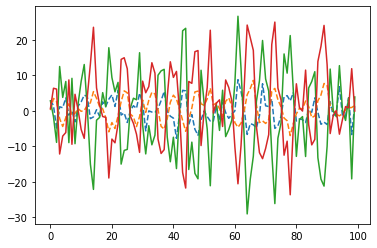

In [28]:
plt.figure()
plt.plot(np.transpose(y),'--' )
plt.plot(np.transpose(y_init))